In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

In [2]:
import Various_Setting_Params as VSP
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
grid = (3,3)

In [4]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/


In [5]:
grid,num_test,lower,upper,coef_seed,x_dist,e_dist,x_low,x_up,x_mean,x_var,bump,iteration_all,batch_size,num_epochs,mu_all,lamb_all = VSP.get_Params(DataPath_Parent)
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]

In [6]:
VSP.set_Params_Data(DataPath_Parent)
num_feat,p,deg,mis,e,alpha,num_train_all = VSP.get_Params_Data(DataPath_Parent)

#### Data Generation

In [7]:
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"x_test_all.pkl"):
        print("Already Exist")
    else:
        x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
        DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)
        Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Already Exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_

#### Run Oracle

In [8]:
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
Oracle: iter= 20 ,cost_Oracle_Ante= 15.200104903979533
Oracle: iter= 40 ,cost_Oracle_Ante= 14.596885929404289
Oracle: iter= 60 ,cost_Oracle_Ante= 15.026113920699338
Oracle: iter= 80 ,cost_Oracle_Ante= 14.899560511015855
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_

#### Run OLS

In [9]:
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 15.542637096531974
OLS: iter= 40 ,cost_OLS_Ante= 14.775261817049653
OLS: iter= 60 ,cost_OLS_Ante= 15.161339987933882
OLS: iter= 80 ,cost_OLS_Ante= 15.594084285435885
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 15.247515825728104
OLS: iter= 40 ,cost_OLS_Ante= 14.67204293501217
OLS: 

#### Run DDR

In [10]:
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.546355566977873
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 14.781150928562798
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.151464378697474
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 15.554302949456766
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 

#### Run SPO+

In [11]:
method_names = ["spo+"]
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 16.244893892552973
['spo+'] : iter= 40 ,cost_EPO_Ante= 16.428055532274975
['spo+'] : iter= 60 ,cost_EPO_Ante= 15.981433882029382
['spo+'] : iter= 80 ,cost_EPO_Ante= 15.859118474945745
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 15.910638976861323
['spo+'] : iter= 40 ,co

#### Run PG

In [12]:
method_names = ["pg"]
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 15.918845753414072
['pg'] : iter= 40 ,cost_EPO_Ante= 16.005345651354325
['pg'] : iter= 60 ,cost_EPO_Ante= 16.099253460658144
['pg'] : iter= 80 ,cost_EPO_Ante= 15.737856293435879
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['pg'] : iter= 20 ,cost_EPO_Ante= 15.964345821584741
['pg'] : iter= 40 ,cost_EPO_Ante=

#### Run LTR

In [13]:
method_names = ["ltr"]
for num_train in num_train_all:
    DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 15.95713211686217
['ltr'] : iter= 40 ,cost_EPO_Ante= 15.603147414964694
['ltr'] : iter= 60 ,cost_EPO_Ante= 15.866009518722377
['ltr'] : iter= 80 ,cost_EPO_Ante= 16.163553325302434
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
['ltr'] : iter= 20 ,cost_EPO_Ante= 16.196152133865972
['ltr'] : iter= 40 ,cost_EPO_

### Comparison

##### DDR vs OLS

In [16]:
regret_N_ante_Dict = {}; h2h_N_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_N_ante = np.zeros(len(num_train_all)); h2h_N_ante = np.zeros(len(num_train_all))
        _index = 0
        for num_train in num_train_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print(DataPath)
            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)

            h2h_N_ante[_index], regret_N_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,0,0,0,cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_N_ante_Dict[mu,lamb] = regret_N_ante
        h2h_N_ante_Dict[mu,lamb] = h2h_N_ante
with open(Result_dir+'regret_N_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_N_ante_Dict,tf)
with open(Result_dir+'h2h_N_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_N_ante_Dict,tf)

/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3b

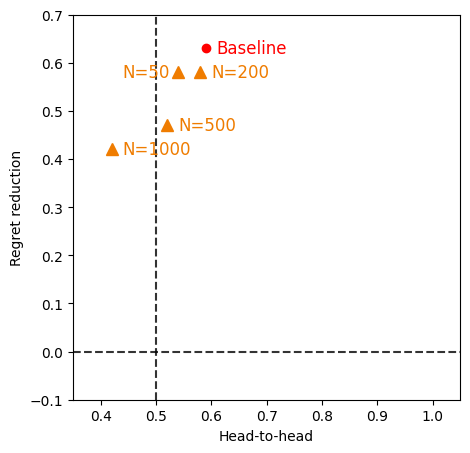

In [24]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_N_ante_Dict[mu,lamb]
regret_fig = regret_N_ante_Dict[mu,lamb]

ms = 8 # marker size
fs = 12 # font size
ls = 12 # label size

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
_indices = [0, 2, 3, 4]
for i in _indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#EF7C00', marker='^', markersize = ms,linestyle='None')
ax.plot(h2h_fig[1], regret_fig[1],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_fig[1] + 0.02, regret_fig[1] - 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 0.1, regret_fig[0] - 0.01, f'N={num_train_all[0]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[2] + 0.02, regret_fig[2] - 0.01, f'N={num_train_all[2]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[3] + 0.02, regret_fig[3] - 0.01, f'N={num_train_all[3]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[4] + 0.02, regret_fig[4] - 0.01, f'N={num_train_all[4]}', color='#EF7C00',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.35, 1.05)
ax.set_ylim(-0.1, 0.7)
ax.label_outer()
# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_OLS_Data_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()

##### DDR vs SPO+

In [25]:
regret_DDR_vs_SPO_N_ante_Dict = {}; h2h_DDR_vs_SPO_N_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_N_ante = np.zeros(len(num_train_all)); h2h_N_ante = np.zeros(len(num_train_all))
        _index = 0
        for num_train in num_train_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print(DataPath)
            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)
            h2h_N_ante[_index], regret_N_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,0,0,0,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        h2h_DDR_vs_SPO_N_ante_Dict[mu,lamb] = regret_N_ante
        regret_DDR_vs_SPO_N_ante_Dict[mu,lamb] = h2h_N_ante
with open(Result_dir+'regret_DDR_vs_SPO_N_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_SPO_N_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_SPO_N_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_SPO_N_ante_Dict,tf)

/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=50_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=100_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=200_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3by3_grid/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1/Shortest_Path/Various_Settings_Rep_SPO_Data_Generation/3b

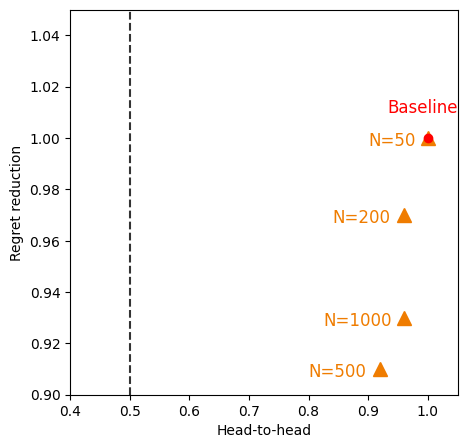

In [37]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_SPO_N_ante_Dict[mu,lamb]
regret_fig = regret_DDR_vs_SPO_N_ante_Dict[mu,lamb]

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
_indices = [0, 2, 3, 4]
for i in _indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#EF7C00', marker='^', markersize = 10,linestyle='None')
ax.plot(h2h_fig[1], regret_fig[1],color='red', marker='o', markersize = 6,linestyle='None')
ax.text(h2h_fig[1] - 0.068, regret_fig[1] + 0.01, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 0.1, regret_fig[0] - 0.003, f'N={num_train_all[0]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[2] - 0.12, regret_fig[2] - 0.003, f'N={num_train_all[2]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[3] - 0.12, regret_fig[3] - 0.003, f'N={num_train_all[3]}', color='#EF7C00',fontsize=fs)
ax.text(h2h_fig[4] - 0.135, regret_fig[4] - 0.003, f'N={num_train_all[4]}', color='#EF7C00',fontsize=fs)

ax.set_xlabel('Head-to-head')
ax.set_ylabel('Regret reduction')
# ax.grid(True)

ax.axvline(0.5, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0.4, 1.05)
ax.set_ylim(0.9, 1.05)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_SPO_Data_ante_mu={mu}_lamb={lamb}.pdf', format='pdf', bbox_inches="tight")
plt.show()
